In [19]:
import pandas as pd
import numpy as np

df= pd.read_csv("/content/observations.csv")

In [20]:
X= df.drop('label', axis=1)
X.shape

(27, 9)

In [21]:
y = df['label']
y.shape

(27,)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
import pandas as pd
import numpy as np

# Read the original data from the CSV file
original_data = pd.read_csv('/content/observations.csv')

# Separate the features and labels
features = original_data.drop('label', axis=1)
labels = original_data['label']

# Generate additional data using various techniques
# For example, you can use numpy's random functions to add noise or variation to the original data
additional_data = features.apply(lambda x: x + np.random.normal(0, 0.1, len(x)))

# Combine the additional data with the original data
combined_data = pd.concat([features, additional_data], axis=0)

# Add the labels back to the combined data
combined_data['label'] = pd.concat([labels] * (len(additional_data) // len(labels)), axis=0)

# Save the combined data to a new CSV file
combined_data.to_csv('combined_data.csv', index=False)


In [24]:
import pandas as pd
import numpy as np

# Read the original data from the CSV file
original_data = pd.read_csv('combined_data.csv')

# Separate the features and labels
features = original_data.drop('label', axis=1)
labels = original_data['label']

# Generate additional data using various techniques
# For example, you can use numpy's random functions to add noise or variation to the original data
additional_data = features.apply(lambda x: x + np.random.normal(0, 0.15, len(x)))

# Combine the additional data with the original data
combined_data = pd.concat([features, additional_data], axis=0)

# Add the labels back to the combined data
combined_data['label'] = pd.concat([labels] * (len(additional_data) // len(labels)), axis=0)

# Save the combined data to a new CSV file
combined_data.to_csv('combined_data.csv', index=False)

In [25]:
import pandas as pd
import numpy as np

# Read the original data from the CSV file
original_data = pd.read_csv('combined_data.csv')

# Separate the features and labels
features = original_data.drop('label', axis=1)
labels = original_data['label']

# Generate additional data using various techniques
# For example, you can use numpy's random functions to add noise or variation to the original data
additional_data = features.apply(lambda x: x + np.random.normal(0, 0.15, len(x)))

# Combine the additional data with the original data
combined_data = pd.concat([features, additional_data], axis=0)

# Add the labels back to the combined data
combined_data['label'] = pd.concat([labels] * (len(additional_data) // len(labels)), axis=0)

# Save the combined data to a new CSV file
combined_data.to_csv('combined_data.csv', index=False)

In [26]:
df2 = pd.read_csv('combined_data.csv')

y = df2['label']
y.shape

(216,)

In [27]:
X= df2.drop('label', axis=1)
X.shape

(216, 9)

In [28]:
from sklearn.preprocessing import LabelEncoder

# Sample labels array
labels = y

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Fit the encoder to the labels array and transform the labels
encoded_labels = encoder.fit_transform(labels)

# Print the encoded labels
print(encoded_labels)

# Decode the encoded labels
decoded_labels = encoder.inverse_transform(encoded_labels)


[5 5 5 7 7 7 0 0 0 1 1 1 4 4 4 2 2 2 3 3 3 6 6 6 8 8 8 5 5 5 7 7 7 0 0 0 1
 1 1 4 4 4 2 2 2 3 3 3 6 6 6 8 8 8 5 5 5 7 7 7 0 0 0 1 1 1 4 4 4 2 2 2 3 3
 3 6 6 6 8 8 8 5 5 5 7 7 7 0 0 0 1 1 1 4 4 4 2 2 2 3 3 3 6 6 6 8 8 8 5 5 5
 7 7 7 0 0 0 1 1 1 4 4 4 2 2 2 3 3 3 6 6 6 8 8 8 5 5 5 7 7 7 0 0 0 1 1 1 4
 4 4 2 2 2 3 3 3 6 6 6 8 8 8 5 5 5 7 7 7 0 0 0 1 1 1 4 4 4 2 2 2 3 3 3 6 6
 6 8 8 8 5 5 5 7 7 7 0 0 0 1 1 1 4 4 4 2 2 2 3 3 3 6 6 6 8 8 8]


In [29]:
from sklearn.model_selection import train_test_split

# Assuming you have a dataset with features (X) and labels (y)
x_train, x_test, y_train, y_test = train_test_split(X, encoded_labels, test_size=0.2, stratify=y)

# The 'test_size' parameter determines the proportion of the dataset to include in the test set.
# In this example, 20% of the data will be used for testing, while the remaining 80% will be used for training.

# The 'stratify' parameter ensures that the labels are evenly distributed in both the training and testing sets.
# This means that the proportion of each label in the original dataset will be maintained in the split sets.

# You can then use the X_train, X_test, y_train, and y_test variables for further analysis or model training.


In [30]:
import tensorflow as tf
from tensorflow import keras

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(9,)),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dense(9, activation='sigmoid'),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dense(9, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                100       
                                                                 
 dense_6 (Dense)             (None, 9)                 99        
                                                                 
 dense_7 (Dense)             (None, 9)                 90        
                                                                 
 dense_8 (Dense)             (None, 9)                 90        
                                                                 
 dense_9 (Dense)             (None, 9)                 90        
                                                                 
Total params: 469 (1.83 KB)
Trainable params: 469 (1.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
# Train the model
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
6/6 [==============================] - 0s 4ms/step - loss: 1.3807 - accuracy: 0.5349
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 1.3657 - accuracy: 0.4826
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 1.3500 - accuracy: 0.4709
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 1.3365 - accuracy: 0.4767
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 1.3231 - accuracy: 0.5000
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 1.3090 - accuracy: 0.4826
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 1.2951 - accuracy: 0.4884
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 1.2816 - accuracy: 0.4884
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 1.2685 - accuracy: 0.4884
Epoch 10/100
6/6 [==============================] - 0s 3ms/step - loss: 1.2551 - accuracy: 0.5349
Epoch 11/100
6/6 [===========

In [43]:
# Make predictions
predictions = model.predict(x_test)

2/2 [==============================] - 0s 7ms/step


In [44]:
print(predictions)

[[1.94063806e-03 2.82155792e-03 2.37928340e-04 1.02202095e-04
  2.03797191e-01 2.33270554e-03 1.28873449e-03 6.74907677e-03
  7.80729890e-01]
 [4.18854365e-03 7.58131617e-04 5.70608908e-03 5.99679945e-04
  4.39293757e-02 4.61287647e-01 2.45545637e-02 4.56133991e-01
  2.84194574e-03]
 [4.21990480e-05 3.30304712e-01 4.69123214e-01 1.76646307e-01
  7.28638563e-03 1.35550275e-03 1.29739484e-02 2.25842046e-03
  9.29377347e-06]
 [6.42667353e-01 8.14403174e-04 7.68854457e-04 2.83165257e-02
  5.18917199e-03 2.79324653e-04 3.11904281e-01 9.84506402e-03
  2.15036256e-04]
 [1.62110582e-03 3.15751822e-04 2.91576772e-03 1.62125027e-04
  3.23348083e-02 5.60597003e-01 1.00954138e-02 3.89304876e-01
  2.65323813e-03]
 [1.16975527e-04 4.17152762e-01 2.57517368e-01 2.97978163e-01
  7.63683533e-03 4.80216753e-04 1.74121447e-02 1.69218809e-03
  1.33687536e-05]
 [4.97793335e-05 4.17909950e-01 3.28672141e-01 2.32820302e-01
  6.43488159e-03 6.08006318e-04 1.19340187e-02 1.56212167e-03
  8.83455141e-06]
 [5.29

In [45]:
from sklearn.preprocessing import LabelEncoder

# Sample labels array
labels = y

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Fit the encoder to the labels array and transform the labels
encoded_labels = encoder.fit_transform(labels)

# Print the encoded labels
print(encoded_labels)

# Decode the encoded labels
decoded_labels = encoder.inverse_transform(encoded_labels)

[5 5 5 7 7 7 0 0 0 1 1 1 4 4 4 2 2 2 3 3 3 6 6 6 8 8 8 5 5 5 7 7 7 0 0 0 1
 1 1 4 4 4 2 2 2 3 3 3 6 6 6 8 8 8 5 5 5 7 7 7 0 0 0 1 1 1 4 4 4 2 2 2 3 3
 3 6 6 6 8 8 8 5 5 5 7 7 7 0 0 0 1 1 1 4 4 4 2 2 2 3 3 3 6 6 6 8 8 8 5 5 5
 7 7 7 0 0 0 1 1 1 4 4 4 2 2 2 3 3 3 6 6 6 8 8 8 5 5 5 7 7 7 0 0 0 1 1 1 4
 4 4 2 2 2 3 3 3 6 6 6 8 8 8 5 5 5 7 7 7 0 0 0 1 1 1 4 4 4 2 2 2 3 3 3 6 6
 6 8 8 8 5 5 5 7 7 7 0 0 0 1 1 1 4 4 4 2 2 2 3 3 3 6 6 6 8 8 8]


In [46]:
pred = np.argmax(predictions, axis=1)
pred

array([8, 5, 2, 0, 5, 1, 1, 1, 6, 8, 4, 6, 4, 2, 8, 8, 0, 0, 3, 7, 5, 1,
       1, 1, 5, 7, 5, 4, 8, 0, 2, 6, 7, 0, 3, 4, 1, 6, 1, 8, 1, 3, 6, 5])

In [47]:

y_test

array([8, 7, 2, 0, 5, 1, 2, 1, 6, 8, 4, 6, 4, 2, 4, 8, 0, 0, 3, 7, 5, 3,
       3, 1, 5, 7, 5, 4, 8, 0, 1, 6, 7, 0, 3, 4, 2, 6, 2, 8, 1, 3, 6, 5])

0.8181818181818182


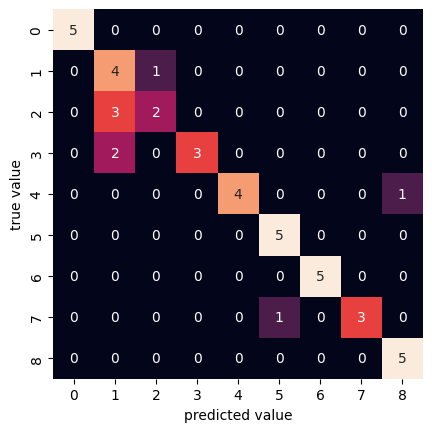

In [48]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
mat = confusion_matrix(y_test, pred)
import seaborn as sns
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))
